# Crop Recommendation using Machine Learning

Precision agriculture has emerged as a popular trend in recent times, as it provides farmers with informed decisions about their farming strategies. To further support this concept, I am pleased to share a comprehensive dataset that enables users to develop a predictive model to suggest the most appropriate crops to cultivate on a specific farm, based on several essential parameters.

This notebook performs Classification task using XGBoostClassifier with MinMaxScaler Rescaling Technique under the XGBoost framework. It is a decision Tree-based ensemble Machine Learning algorithm that uses a Gradient Boosting framework.

# About the dataset

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India. Gathered over the period by ICFA, India.

THE INFORMATION IN THE DATASET IS PROVIDED TO THE BEST OF KNOWLEDGE OF ICFA. THE BELOW DATA CAN BE USED PUBLICALLY UNDER ALL PUBLIC AND PRIVATE UNDERTAKINGS

**Data fields**
* `N` - ratio of Nitrogen content in soil
* `P` - ratio of Phosphorous content in soil
* `K` - ratio of Potassium content in soil
* `temperature` - temperature in degree Celsius
* `humidity` - relative humidity in %
* `ph` - ph value of the soil
* `rainfall` - rainfall in mm

# Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import warnings


warnings.filterwarnings('ignore')

## Data Fetching
Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [2]:
PATH = r'C:\Users\Sadaqat Ali\Desktop\DM Project\Crop_recommendation.csv'
df = pd.read_csv(PATH)

## Exploratory Data Analysis

It is a preliminary analysis technique used to understand the characteristics of the data and gain insights into it before applying any formal modeling or statistical methods.

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.size

17600

In [8]:
df.shape

(2200, 8)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df['label'].nunique()

22

In [12]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [13]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

### Correlation Map
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

In [14]:
labels = df['label']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

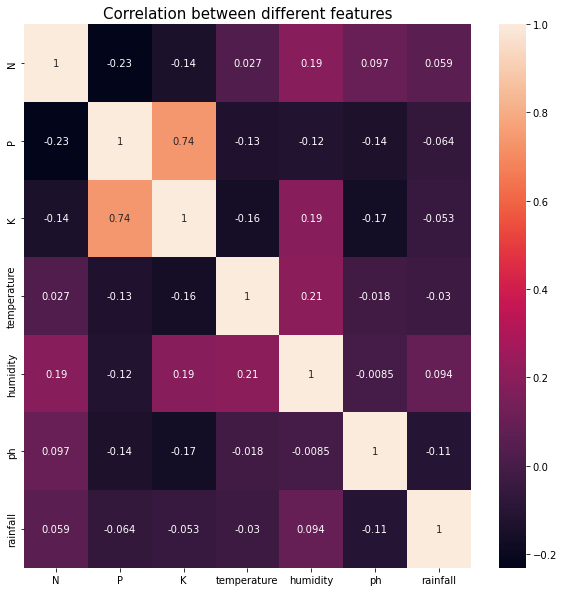

In [15]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(df.corr(),annot=True)
plt.title('Corelation between different features', fontsize = 15, c='black')
plt.show()

### Histograms for each attribute

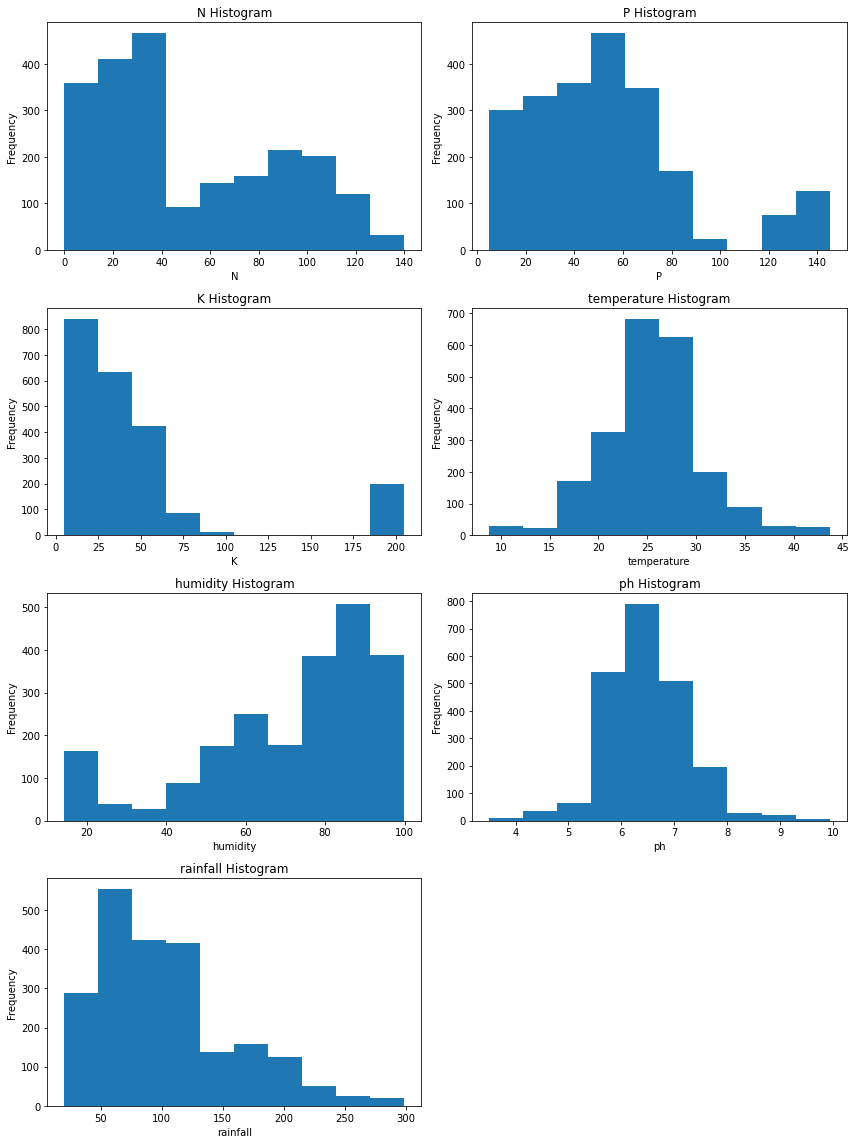

In [16]:
data = df[features]

# Creating a figure with multiple subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Looping over the columns and plotting histograms
for i, column in enumerate(features):
    row = i // 2
    col = i % 2
    
    axs[row, col].hist(data[column], bins=10)
    axs[row, col].set_title(f'{column} Histogram')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Removing the empty subplot if the number of columns is odd
if len(features) % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [17]:
df_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
df_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


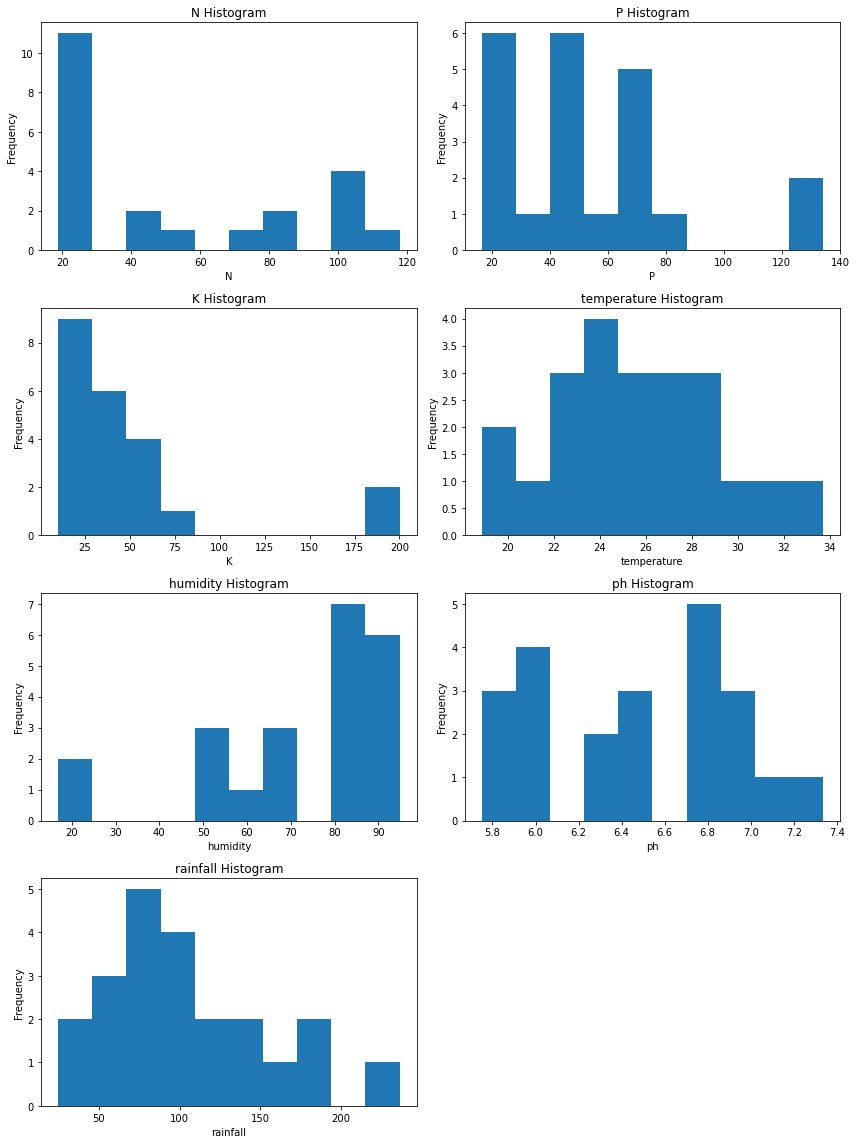

In [18]:
data = df_summary[features]

# Creating a figure with multiple subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Looping over the columns and plotting histograms
for i, column in enumerate(features):
    row = i // 2
    col = i % 2
    
    axs[row, col].hist(data[column], bins=10)
    axs[row, col].set_title(f'{column} Histogram')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Removing the empty subplot if the number of columns is odd
if len(features) % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

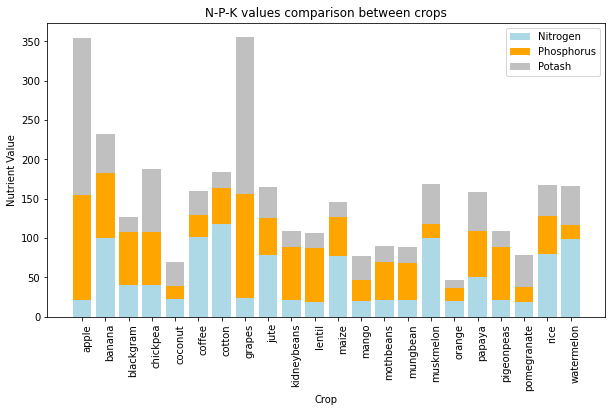

In [19]:
x = df_summary.index
y1 = df_summary['N']
y2 = df_summary['P']
y3 = df_summary['K']

colors = ['lightblue', 'orange', 'silver']


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y1, color=colors[0], label='Nitrogen')
ax.bar(x, y2, color=colors[1], bottom=y1, label='Phosphorus')
ax.bar(x, y3, color=colors[2], bottom=y1 + y2, label='Potash')

ax.set_title("N-P-K values comparison between crops")
ax.set_xlabel("Crop")
ax.set_ylabel("Nutrient Value")
plt.xticks(rotation=90, ha='left', va='top')

ax.legend()
plt.subplots_adjust(bottom=0.2)
plt.show()

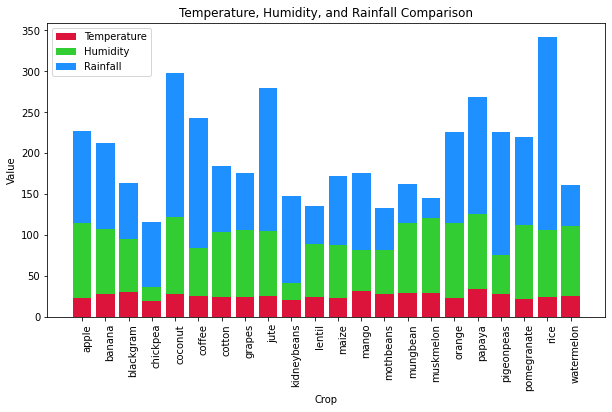

In [20]:
x = df_summary.index
y1 = df_summary['temperature']
y2 = df_summary['humidity']
y3 = df_summary['rainfall']

colors = ['crimson', 'limegreen', 'dodgerblue']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y1, color=colors[0], label='Temperature')
ax.bar(x, y2, color=colors[1], bottom=y1, label='Humidity')
ax.bar(x, y3, color=colors[2], bottom=y1 + y2, label='Rainfall')

ax.set_title("Temperature, Humidity, and Rainfall Comparison")
ax.set_xlabel("Crop")
ax.set_ylabel("Value")
plt.xticks(rotation=90, ha='left', va='top')

ax.legend()
plt.subplots_adjust(bottom=0.2)
plt.show()

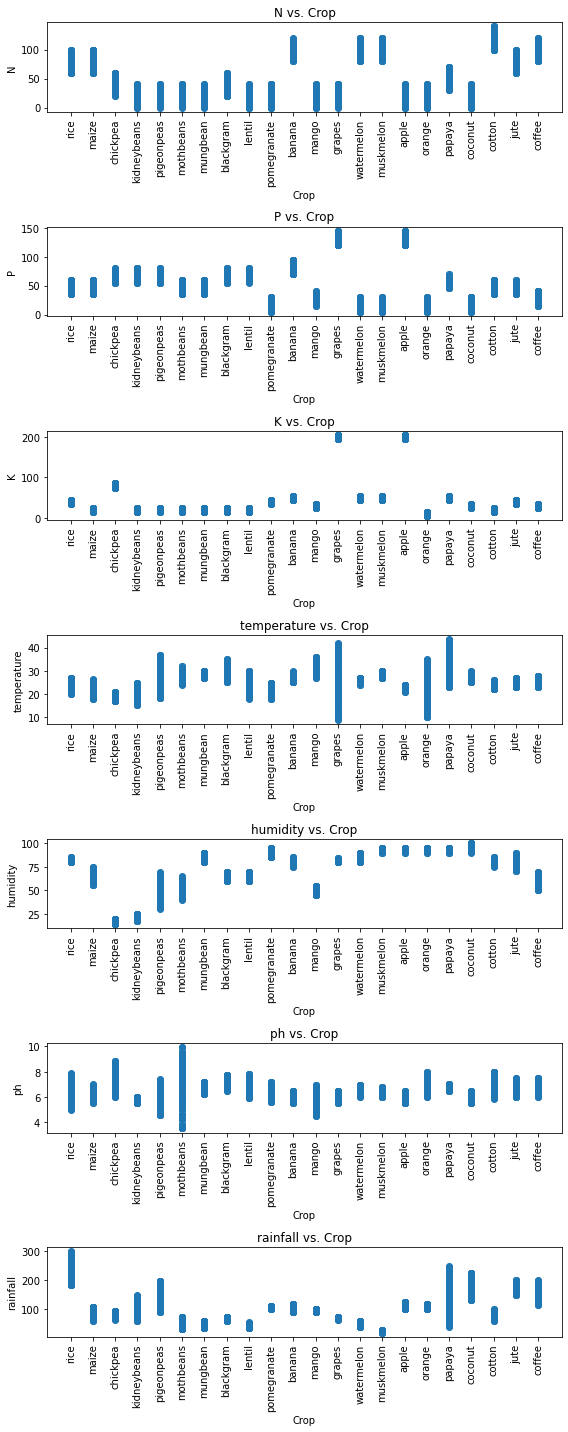

In [21]:
# Creating a figure with multiple subplots
fig, axs = plt.subplots(len(features), 1, figsize=(8, 20))

# Looping over attributes and plotting scatter plots
for i, attribute in enumerate(features):
    axs[i].scatter(labels, df[attribute])
    axs[i].set_title(f'{attribute} vs. Crop')
    axs[i].set_xlabel('Crop')
    axs[i].set_ylabel(attribute)
    axs[i].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

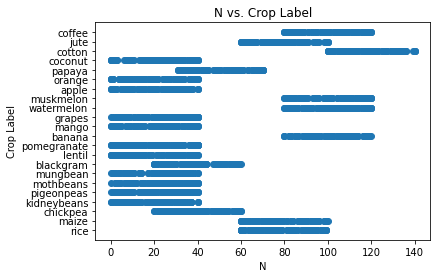

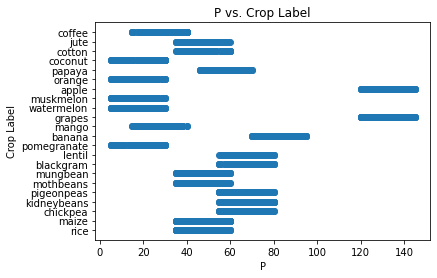

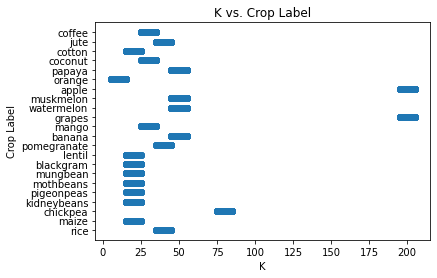

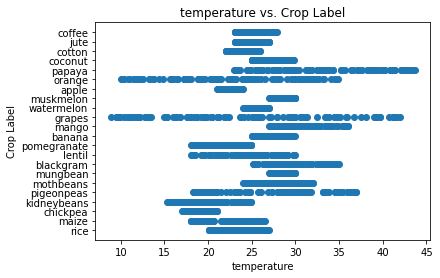

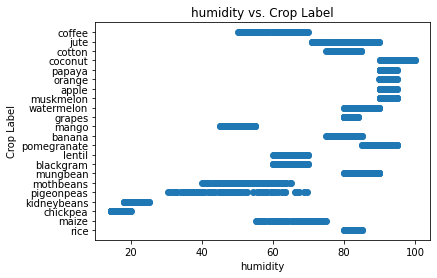

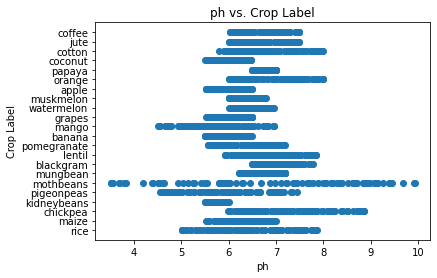

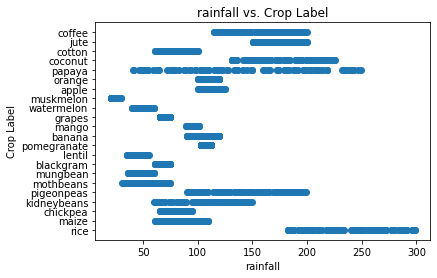

In [22]:
for features in features:
    plt.scatter(df[features], labels)
    plt.title(f'{features} vs. Crop Label')
    plt.xlabel(features)
    plt.ylabel('Crop Label')
    plt.show()

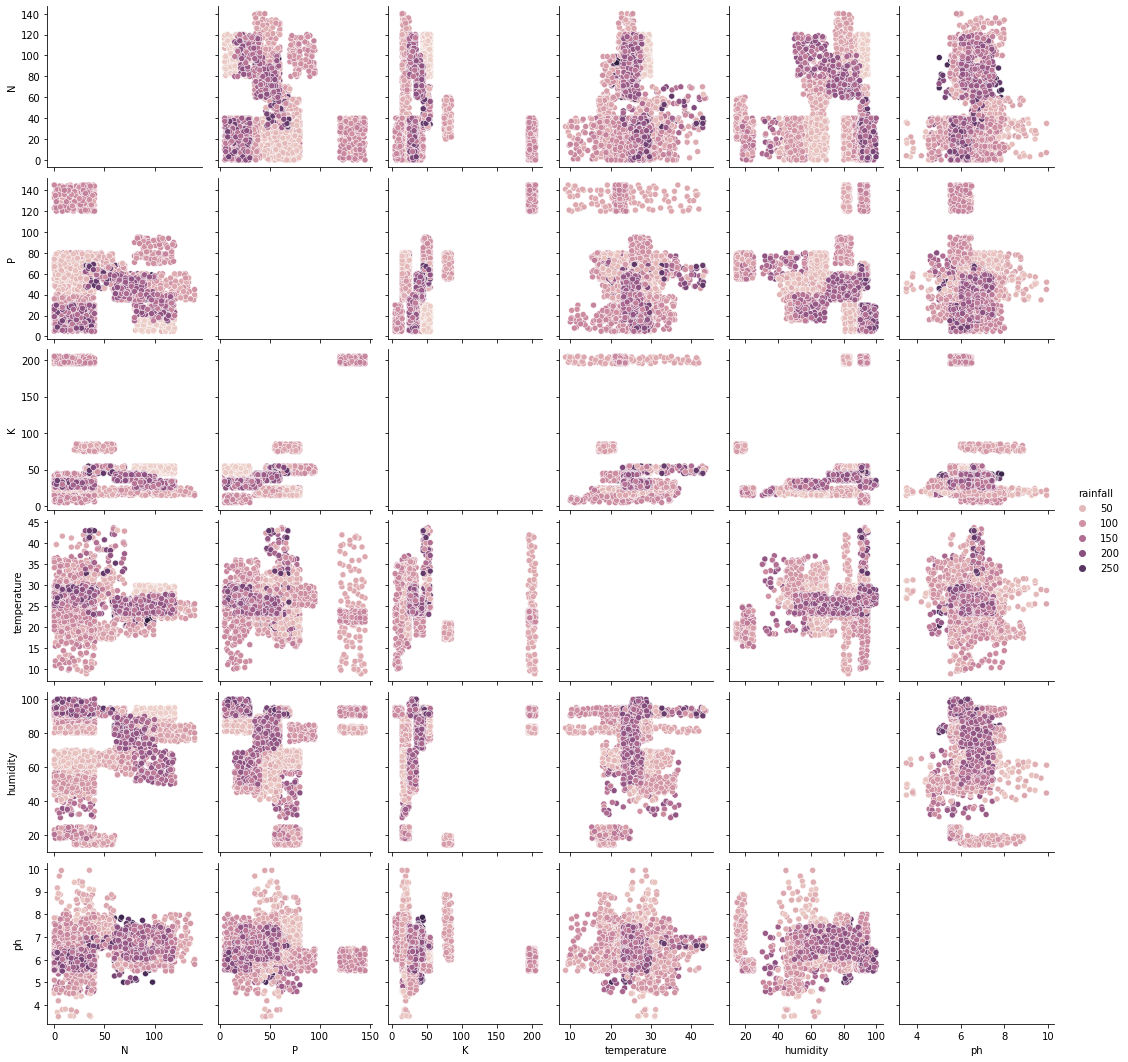

In [23]:
sns.pairplot(df,features)
plt.show()

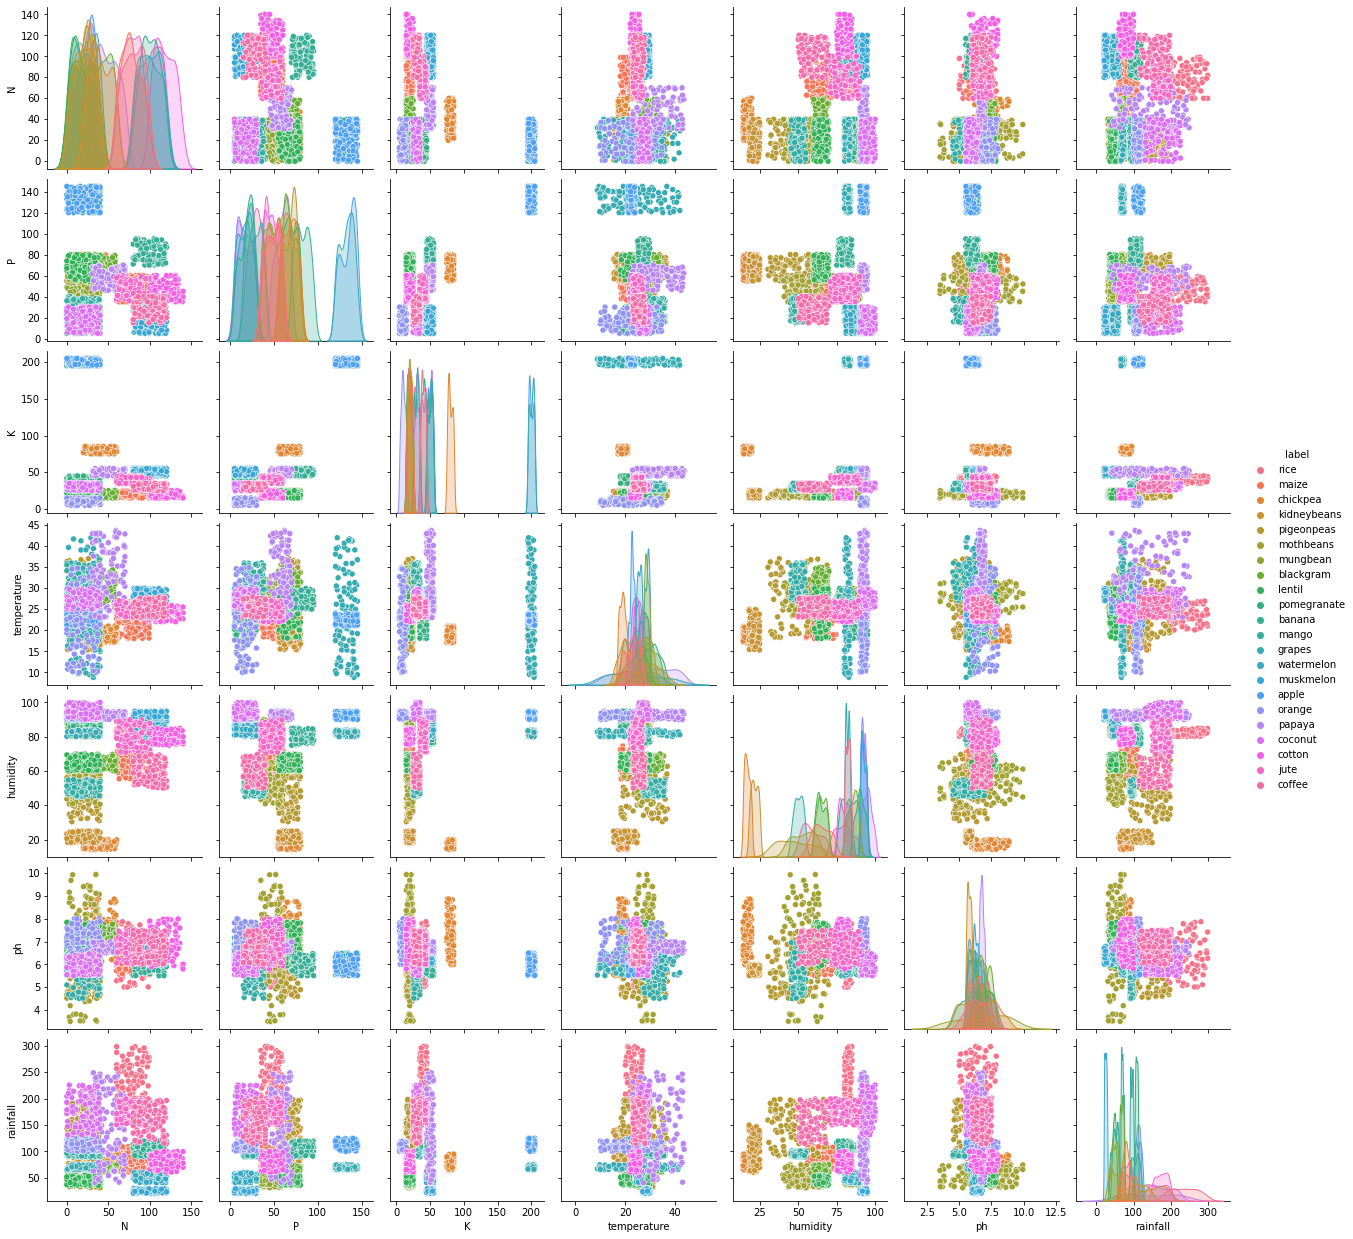

In [24]:
attributes = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Creating a scatter matrix with label variable
sns.pairplot(df, vars=attributes, hue='label')
plt.show()

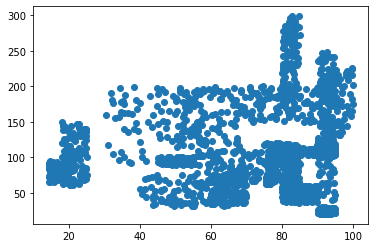

In [25]:
plt.scatter(df['humidity'],df['rainfall'])

# Feature Selections
It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

In [26]:
features = df.iloc[:, :-1]  # Selecting all columns except the last one as features
labels = df.iloc[:, -1]    # Selecting the last column as labels
target = df['label']

# Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=2)

# Printing the number of samples in each set
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))


Number of samples in the training set: 1760
Number of samples in the testing set: 440


# Models Implementation

In [28]:
acc = []
model = []

## KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train,Y_train)

predicted_values = knn.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)

print("KNN Accuracy is: ", x)

KNN Accuracy is:  0.975


In [30]:
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]


In [31]:
knn_train_accuracy = knn.score(X_train,Y_train)
print("knn_train_accuracy = ",knn.score(X_train,Y_train))

knn_test_accuracy = knn.score(X_test,Y_test)
print("knn_test_accuracy = ",knn.score(X_test,Y_test))

knn_train_accuracy =  0.9886363636363636
knn_test_accuracy =  0.975


## Hyperparameter Tuning 

In [32]:
a=[]
for i in range(1,47,2):
    a.append(i)
len(a)

23

In [33]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : a,
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [34]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=7, n_jobs = -1)

In [35]:
g_res = gs.fit(X_train, Y_train)
gsresult=pd.DataFrame(g_res.cv_results_)
gsresult.head()

Fitting 7 folds for each of 138 candidates, totalling 966 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011550,0.005539,0.028574,0.004254,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.988095,0.980159,0.984127,0.980080,0.976096,0.972112,0.984064,0.980676,0.004977,13
1,0.012219,0.005362,0.012736,0.005510,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.988095,0.980159,0.984127,0.980080,0.976096,0.972112,0.984064,0.980676,0.004977,13
2,0.011251,0.005777,0.027965,0.010272,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.984127,0.972222,0.984127,0.984064,0.980080,0.964143,0.980080,0.978406,0.007018,29
3,0.006759,0.007805,0.013452,0.005494,minkowski,3,distance,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.984127,0.972222,0.984127,0.980080,0.980080,0.964143,0.984064,0.978406,0.007018,31
4,0.012099,0.007201,0.026445,0.006805,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.992063,0.980159,0.988095,0.984064,0.980080,0.968127,0.984064,0.982379,0.007025,5


In [36]:
gsresult[['param_metric','param_weights','param_n_neighbors','mean_test_score']].head()

,param_metric,param_weights,param_n_neighbors,mean_test_score
0,minkowski,uniform,1,0.980676
1,minkowski,distance,1,0.980676
2,minkowski,uniform,3,0.978406
3,minkowski,distance,3,0.978406
4,minkowski,uniform,5,0.982379


In [37]:
g_res.best_score_

0.9846554823788746

In [38]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Knn Accuracy On Training Data =  1.0
Knn Accuracy On Testing Data =  0.975
Cross validation score:  [0.97954545 0.98636364 0.98636364 0.98636364 0.97727273]
0.9831818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean 

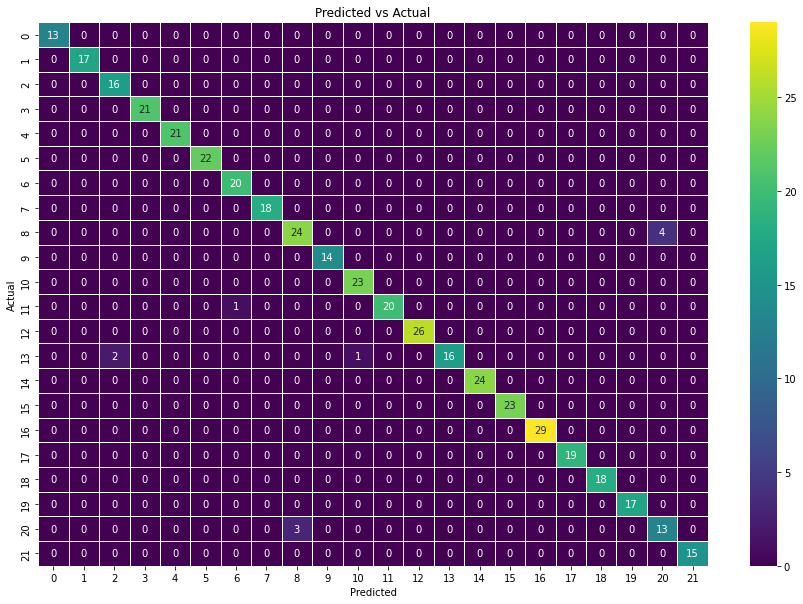

In [39]:
best_knn=KNeighborsClassifier(n_neighbors = 5, weights = 'distance',metric = 'manhattan')
best_knn.fit(X_train, Y_train)
predicted_values = best_knn.predict(X_test)

knn_train_accuracy = best_knn.score(X_train,Y_train)
print("Knn Accuracy On Training Data = ",best_knn.score(X_train,Y_train))

knn_test_accuracy = best_knn.score(X_test,Y_test)
print("Knn Accuracy On Testing Data = ",best_knn.score(X_test,Y_test))

score = cross_val_score(best_knn,features,target,cv=5)
print('Cross validation score: ',score)

print(score.mean())

acc.append(score.mean())
model.append('K Nearest Neighbours')

print(classification_report(Y_test,predicted_values))

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(Y_test,predicted_values)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,Y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)

In [41]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs = GridSearchCV(GaussianNB(), params_NB, verbose = 1, cv=7, n_jobs = -1)

In [42]:
g_res = gs.fit(X_train, Y_train)
gsresult=pd.DataFrame(g_res.cv_results_)
gsresult.head()

Fitting 7 folds for each of 100 candidates, totalling 700 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013400,0.005470,0.008930,0.007733,1.0,{'var_smoothing': 1.0},0.869048,0.853175,0.853175,0.840637,0.860558,0.864542,0.852590,0.856246,0.008678,100
1,0.017857,0.005469,0.004466,0.007061,0.811131,{'var_smoothing': 0.8111308307896871},0.880952,0.873016,0.876984,0.884462,0.888446,0.884462,0.872510,0.880119,0.005681,99
2,0.016063,0.008420,0.007998,0.008470,0.657933,{'var_smoothing': 0.657933224657568},0.896825,0.880952,0.880952,0.912351,0.912351,0.888446,0.888446,0.894332,0.012438,98
3,0.015395,0.002333,0.006328,0.007350,0.53367,{'var_smoothing': 0.533669923120631},0.916667,0.880952,0.896825,0.912351,0.920319,0.900398,0.912351,0.905695,0.012771,97
4,0.024350,0.021573,0.012962,0.005400,0.432876,{'var_smoothing': 0.43287612810830584},0.924603,0.888889,0.900794,0.912351,0.920319,0.904382,0.916335,0.909667,0.011505,96


In [43]:
g_res.best_score_

0.9960204533340561

In [44]:
g_res.best_params_

{'var_smoothing': 1.873817422860383e-05}

In [45]:
NaiveBayes=GaussianNB(var_smoothing= 1.873817422860383e-05)
score = cross_val_score(GaussianNB(var_smoothing= 1.873817422860383e-05),features,target,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


In [46]:
NaiveBayes.fit(X_train,Y_train)
nb_train_accuracy = NaiveBayes.score(X_train,Y_train)
print("Accuracy On Training Data = ",NaiveBayes.score(X_train,Y_train))

nb_test_accuracy = NaiveBayes.score(X_test,Y_test)
print("Accuracy On Testing Data = ",NaiveBayes.score(X_test,Y_test))

Accuracy On Training Data =  0.9960227272727272
Accuracy On Testing Data =  0.9886363636363636


In [47]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation score: ',score)

print(score.mean())

acc.append(score.mean())
model.append('Naive Bayes')

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
0.9950000000000001


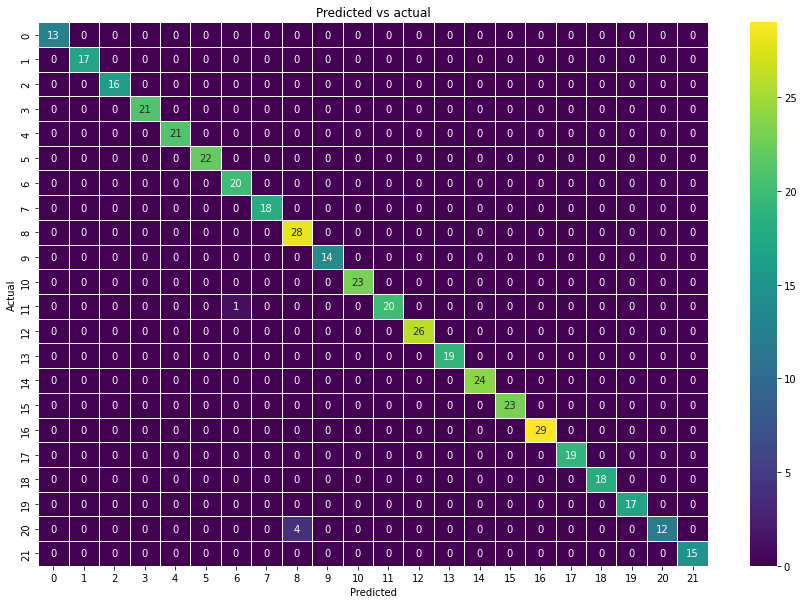

In [48]:
y_pred = NaiveBayes.predict(X_test)
y_true = Y_test

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

## Decision Tree 
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a outcome label.

In [49]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,Y_train)

predicted_values = DecisionTree.predict(X_test)
x = accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Y_test,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [50]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.1, .01, .001], 'max_depth' : [5, 6, 7, 8, 9], 'criterion' :['gini', 'entropy']}
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, verbose=True)
g_res = gs.fit(X_train, Y_train)
gsresult=pd.DataFrame(g_res.cv_results_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


In [51]:
gsresult.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007313,0.007144,0.000000,0.000000,0.1,gini,5,auto,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76
1,0.007204,0.007016,0.005331,0.006689,0.1,gini,5,sqrt,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76
2,0.006250,0.007655,0.003130,0.006260,0.1,gini,5,log2,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76
3,0.006031,0.007394,0.003431,0.006861,0.1,gini,6,auto,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76
4,0.009466,0.008431,0.003128,0.006257,0.1,gini,6,sqrt,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",0.048295,0.048295,0.051136,0.051136,0.048295,0.049432,0.001392,76


In [52]:
g_res.best_score_

0.9607954545454545

In [53]:
g_res.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'log2'}

In [54]:
DT=DecisionTreeClassifier(ccp_alpha=0.001,criterion='entropy',max_depth=9,max_features='log2')

score = cross_val_score(DT, features, target,cv=5)
print('Cross validation score: ',score)
print(score.mean())

acc.append(score.mean())
model.append('Decision Tree')

Cross validation score:  [0.97045455 0.97045455 0.95       0.96363636 0.95      ]
0.9609090909090909


In [55]:
DT.fit(X_train,Y_train)
dt_train_accuracy = DT.score(X_train,Y_train)
print("Training accuracy = ",DT.score(X_train,Y_train))

dt_test_accuracy = DT.score(X_test,Y_test)
print("Testing accuracy = ",DT.score(X_test,Y_test))

Training accuracy =  0.9897727272727272
Testing accuracy =  0.9659090909090909


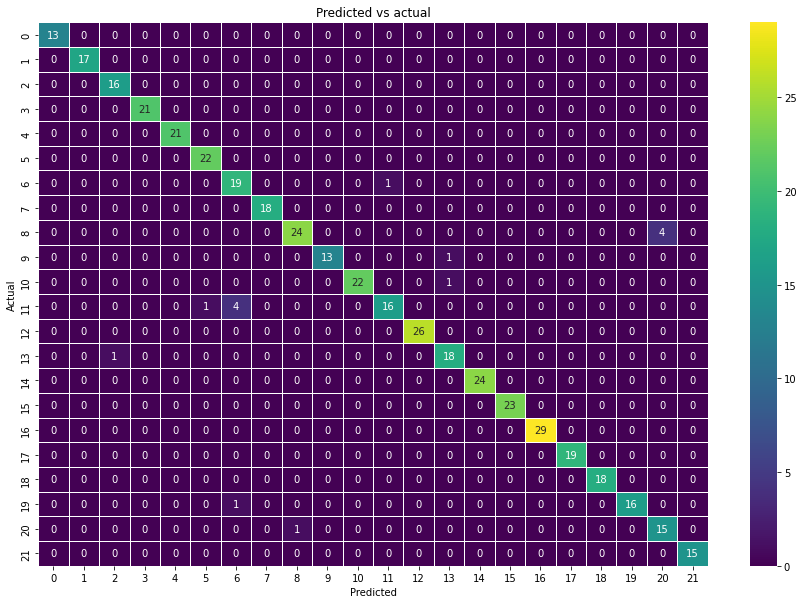

In [56]:
y_pred = DT.predict(X_test)
y_true = Y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

## Logistic Regression
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). This can be extended to model several classes of events.

In [57]:
LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,Y_train)

predicted_values = LogReg.predict(X_test)

x = accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [58]:
param_grid = {
    'max_iter': [100, 200, 300],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

gs = GridSearchCV(estimator=LogisticRegression(random_state=2),
                  param_grid=param_grid,
                  cv=5,
                  verbose=True)
g_res = gs.fit(X_train, Y_train)
gsresult=pd.DataFrame(g_res.cv_results_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [59]:
gsresult.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.139604,0.095317,0.005073,0.006529,0.1,100,liblinear,"{'C': 0.1, 'max_iter': 100, 'solver': 'libline...",0.934659,0.937500,0.957386,0.943182,0.954545,0.945455,0.009055,16
1,0.228053,0.010261,0.003109,0.006219,0.1,100,lbfgs,"{'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}",0.954545,0.946023,0.965909,0.963068,0.960227,0.957955,0.007051,7
2,0.097390,0.006226,0.000000,0.000000,0.1,200,liblinear,"{'C': 0.1, 'max_iter': 200, 'solver': 'libline...",0.934659,0.937500,0.957386,0.943182,0.954545,0.945455,0.009055,16
3,0.515054,0.027442,0.003125,0.006250,0.1,200,lbfgs,"{'C': 0.1, 'max_iter': 200, 'solver': 'lbfgs'}",0.968750,0.963068,0.968750,0.963068,0.957386,0.964205,0.004252,4
4,0.100465,0.007658,0.003125,0.006251,0.1,300,liblinear,"{'C': 0.1, 'max_iter': 300, 'solver': 'libline...",0.934659,0.937500,0.957386,0.943182,0.954545,0.945455,0.009055,16


In [60]:
g_res.best_score_

0.9676136363636363

In [61]:
g_res.best_params_

{'C': 1, 'max_iter': 300, 'solver': 'lbfgs'}

In [62]:
LogReg=LogisticRegression(max_iter= 300,
    C= 1,
    solver ='lbfgs')

score = cross_val_score(LogReg, features, target,cv=5)
print('Cross validation score: ',score)
print(score.mean())

acc.append(score.mean())
model.append('Decision Tree')

Cross validation score:  [0.96590909 0.96818182 0.975      0.96590909 0.95909091]
0.9668181818181818


In [63]:
LogReg.fit(X_train,Y_train)
LogReg_train_accuracy = LogReg.score(X_train,Y_train)
print("Accuracy On Training Data = ",LogReg.score(X_train,Y_train))

LogReg_test_accuracy = LogReg.score(X_test,Y_test)
print("Accuracy On Testing Data = ",LogReg.score(X_test,Y_test))

Accuracy On Training Data =  0.977840909090909
Accuracy On Testing Data =  0.9613636363636363


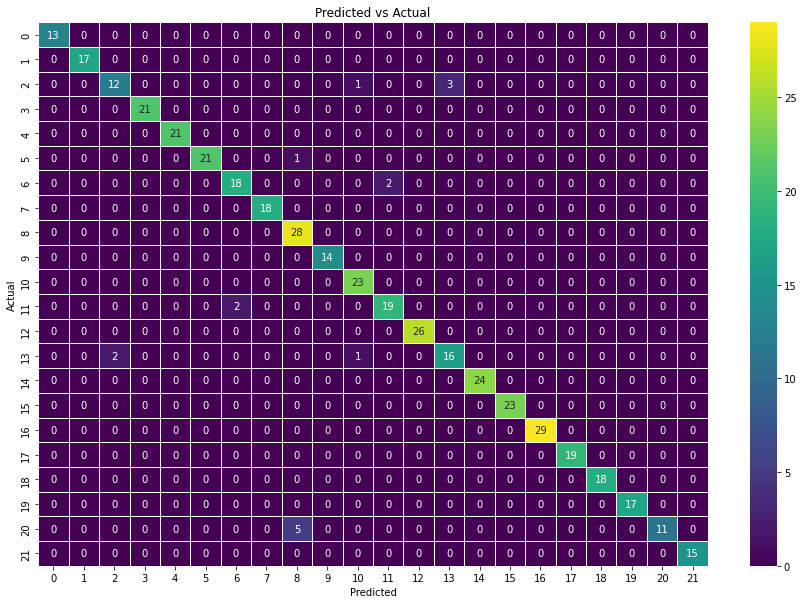

In [64]:
y_pred = LogReg.predict(X_test)
y_true = Y_test

from sklearn.metrics import confusion_matrix

cm_LogReg = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_LogReg, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

 ## Random Forest
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [65]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

x = accuracy_score(Y_test, predicted_values)
print("Random Forest Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [66]:
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation score: ',score)
print(score.mean())
acc.append(score.mean())
model.append('Random Forest')

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]
0.9945454545454545


In [67]:
rf_train_accuracy = RF.score(X_train,Y_train)
print("Training accuracy = ",RF.score(X_train,Y_train))

rf_test_accuracy = RF.score(X_test,Y_test)
print("Testing accuracy = ",RF.score(X_test,Y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


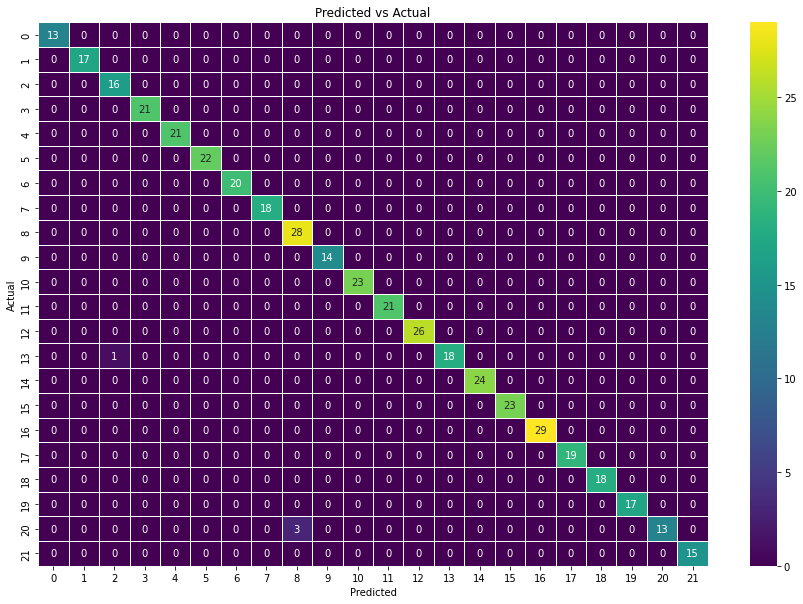

In [68]:
y_pred = RF.predict(X_test)
y_true = Y_test

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

 ## XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [69]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(Y_train)
y_test_encoded = le.transform(Y_test)

xgb_clf = xgb.XGBClassifier(random_state=2)

xgb_clf.fit(X_train, y_train_encoded)

y_pred_encoded = xgb_clf.predict(X_test)

y_pred = le.inverse_transform(y_pred_encoded)

x = accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      

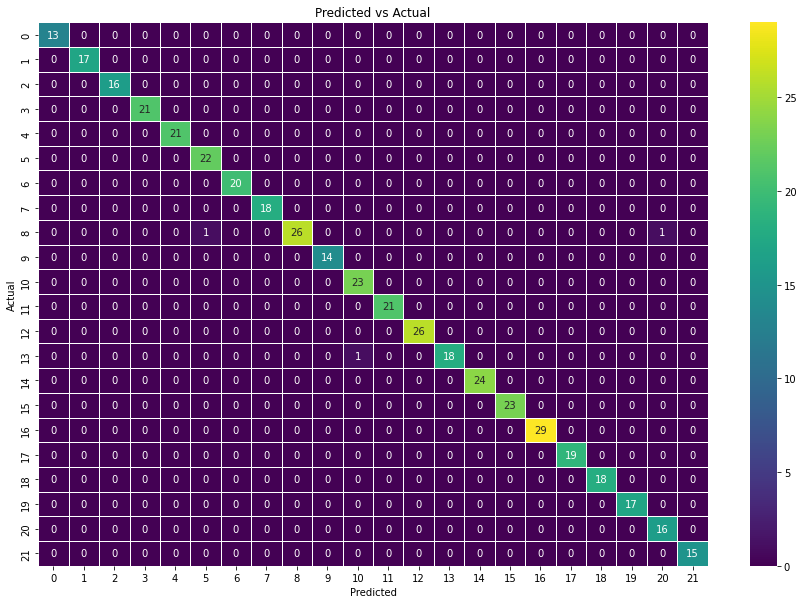

In [70]:
y_true_encoded = le.transform(y_true)

y_pred_encoded = xgb_clf.predict(X_test)

cm = confusion_matrix(y_true_encoded, y_pred_encoded)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

## CatBoostClassifier

CatBoost is an algorithm for gradient boosting on decision trees. Developed by Yandex researchers and engineers, it is the successor of the MatrixNet algorithm that is widely used within the company for ranking tasks, forecasting and making recommendations

In [71]:
from catboost import CatBoostClassifier 
catB=CatBoostClassifier(verbose=False)

catB.fit(X_train,Y_train)


predicted_values = catB.predict(X_test)

x = accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Catboost')
print("CatBoost's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

CatBoost's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.96      0.89      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00    

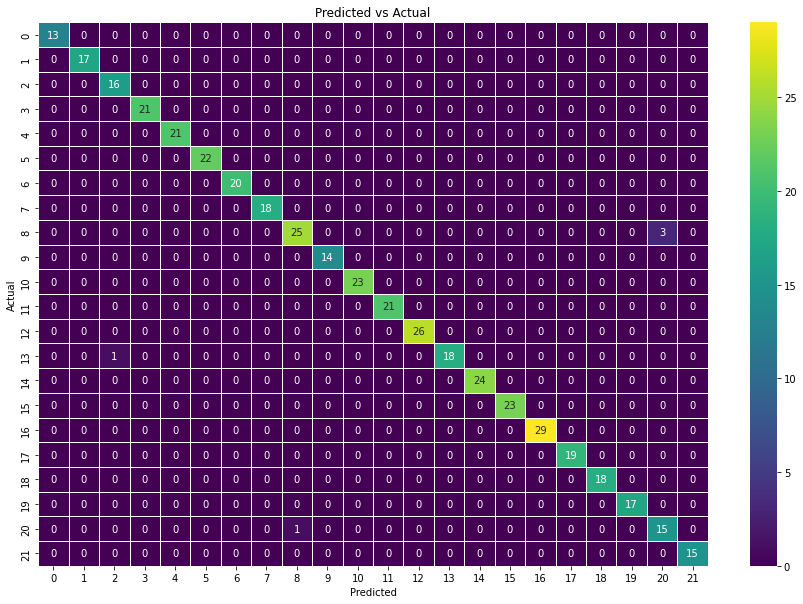

In [72]:
y_pred = catB.predict(X_test)
y_true = Y_test

cm_catB = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_catB, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

 ## LinearSVC

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

A Support Vector Machine is a discriminative classifier formally defined by a separating hyperplane. In other terms, for a given known/labelled data points, the SVM outputs an appropriate hyperplane that classifies the inputted new cases based on the hyperplane. In 2-Dimensional space, this hyperplane is a line separating a plane into two segments where each class or group occupied on either side.

LinearSVC is similar to SVC with kernel=’linear’. It has more flexibility in the choice of tuning parameters and is suited for large samples.

In [73]:
from sklearn.svm import LinearSVC

Linearsvc=LinearSVC(C=2)
Linearsvc.fit(X_train,Y_train)

predicted_values = Linearsvc.predict(X_test)

x = accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('LinearSVC')
print("LinearSVC's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

LinearSVC's Accuracy is:  0.7818181818181819
              precision    recall  f1-score   support

       apple       1.00      0.77      0.87        13
      banana       1.00      0.65      0.79        17
   blackgram       0.50      0.44      0.47        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.24      0.38        21
      coffee       1.00      0.95      0.98        22
      cotton       0.57      1.00      0.73        20
      grapes       1.00      1.00      1.00        18
        jute       0.68      0.61      0.64        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.61      0.76        23
       maize       1.00      0.19      0.32        21
       mango       1.00      0.88      0.94        26
   mothbeans       0.49      1.00      0.66        19
    mungbean       0.89      1.00      0.94        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      0.97   

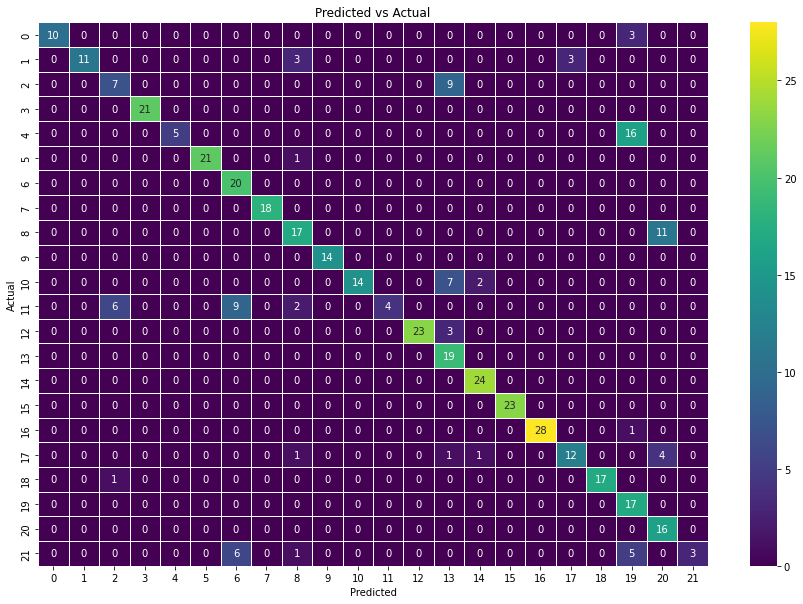

In [74]:
y_pred = Linearsvc.predict(X_test)
y_true = Y_test

cm_Linearsvc = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_Linearsvc, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

 ## NuSVC
The nu-support vector classifier (Nu-SVC) is similar to the SVC with the only difference that the nu-SVC classifier has a nu parameter to control the number of support vectors.


In [75]:
from sklearn.svm import NuSVC
nusvc=NuSVC()
nusvc.fit(X_train,Y_train)

predicted_values = nusvc.predict(X_test)

x = accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('NuSVC')
print("NuSVC's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

NuSVC's Accuracy is:  0.9613636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.89      1.00      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.95      0.98        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.82      1.00      0.90        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       0.89      1.00      0.94        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1

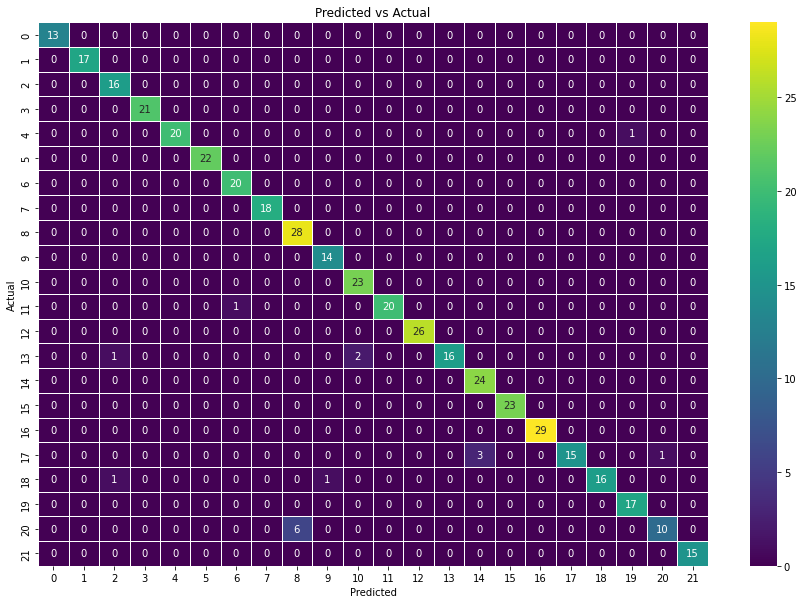

In [76]:
y_pred = nusvc.predict(X_test)
y_true = Y_test

cm_nusvc = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nusvc, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

 ## LightGBM
Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms.

In [77]:
import lightgbm as lgb
lgbm=lgb.LGBMClassifier(max_depth=6)
lgbm.fit(X_train,Y_train)

predicted_values = lgbm.predict(X_test)

x = accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('LightGBM')
print("LightGBM's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values))

LightGBM's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

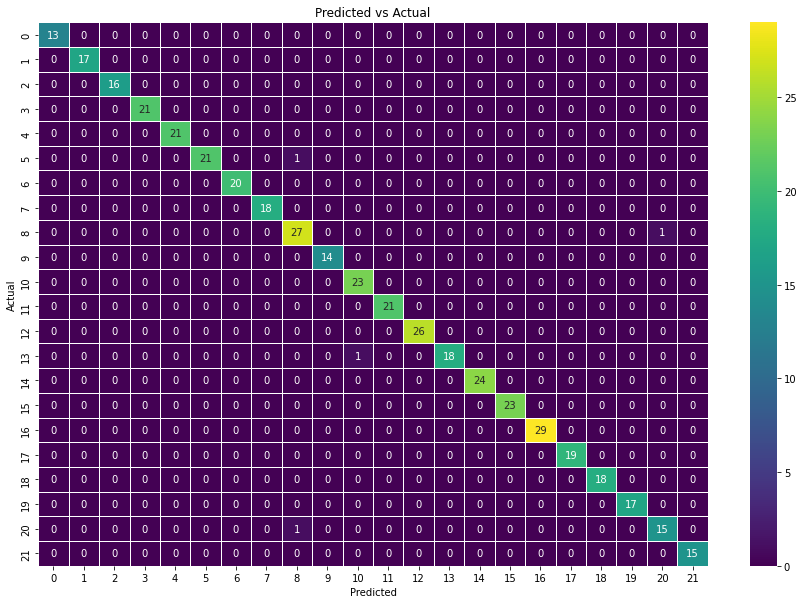

In [78]:
y_pred = lgbm.predict(X_test)
y_true = Y_test

cm_lgbm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_lgbm, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs Actual')
plt.show()

# Results

## Accuracy Comparison

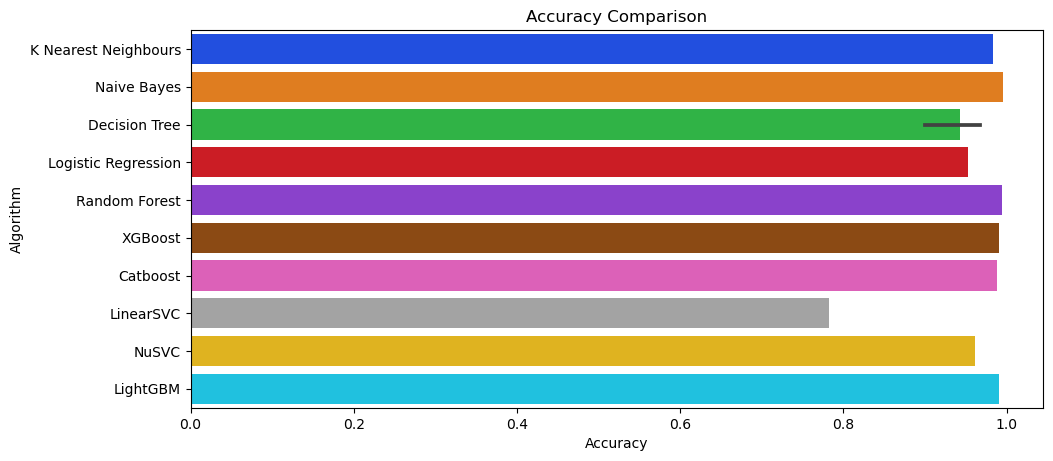

In [87]:
plt.figure(figsize=[11, 5], dpi=100)

# Plot the bar chart
sns.barplot(x=acc, y=model, palette='bright')

# Set the title and labels
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')

# Display the plot
plt.show()

In [80]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

K Nearest Neighbours --> 0.9831818181818182
Naive Bayes --> 0.9950000000000001
Decision Tree --> 0.9668181818181818
Logistic Regression --> 0.9522727272727273
Random Forest --> 0.9945454545454545
XGBoost --> 0.990909090909091
Catboost --> 0.9886363636363636
LinearSVC --> 0.7818181818181819
NuSVC --> 0.9613636363636363
LightGBM --> 0.990909090909091


# Predictions

## New Instance

In [79]:
#     new_instance = {
#         'N': [50],
#         'P': [30],
#         'K': [40],
#         'temperature': [25],
#         'humidity': [60],
#         'ph': [6.5],
#         'rainfall': [100]
#     }
#     models = [DecisionTree, LogReg, RF, knn, NaiveBayes, xgb_clf, catB, Linearsvc, nusvc, lgbm]


#     for model in models:
#         prediction = model.predict(new_data)
#         print(f"{model.__class__.__name__} --> {prediction}")


## Ipy widgets for inputs 

In [112]:
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

# # Define the input widget for the new instance
# N = widgets.IntSlider(value=50, min=0, max=100, description='N')
# P = widgets.IntSlider(value=30, min=0, max=100, description='P')
# K = widgets.IntSlider(value=40, min=0, max=100, description='K')
# temperature = widgets.IntSlider(value=25, min=0, max=50, description='Temperature')
# humidity = widgets.IntSlider(value=60, min=0, max=100, description='Humidity')
# ph = widgets.FloatSlider(value=6.5, min=0, max=14, step=0.1, description='pH')
# rainfall = widgets.IntSlider(value=100, min=0, max=200, description='Rainfall')

# # Create the interactive function
# @interact
# def predict_new_instance(N=N, P=P, K=K, temperature=temperature, humidity=humidity, ph=ph, rainfall=rainfall):
#     models = [DecisionTree, LogReg, RF, knn, NaiveBayes, catB, Linearsvc, nusvc, lgbm]

#     instance = [[N, P, K, temperature, humidity, ph, rainfall]]

#     for model in models:
#         prediction = model.predict(instance)
#         print(f"{model.__class__.__name__} --> {prediction}")


In [111]:
# from ipywidgets import interact, Dropdown

# # Define the input widgets for the new instance
# N = widgets.IntSlider(value=50, min=0, max=100, description='N')
# P = widgets.IntSlider(value=30, min=0, max=100, description='P')
# K = widgets.IntSlider(value=40, min=0, max=100, description='K')
# temperature = widgets.IntSlider(value=25, min=0, max=50, description='Temperature')
# humidity = widgets.IntSlider(value=60, min=0, max=100, description='Humidity')
# ph = widgets.FloatSlider(value=6.5, min=0, max=14, step=0.1, description='pH')
# rainfall = widgets.IntSlider(value=100, min=0, max=200, description='Rainfall')
# model_dropdown = Dropdown(options=['Decision Tree', 'Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes', 'Cat Boost', 'Linear SVC', 'Nusvc', 'LGMB'], description='Model')

# # Define the interactive function
# def predict_new_instance(N, P, K, temperature, humidity, ph, rainfall, model):
#     # Convert the input values into a 2D array
#     instance = [[N, P, K, temperature, humidity, ph, rainfall]]

#     # Select the chosen model and make a prediction
#     if model == 'Decision Tree':
#         prediction = DecisionTree.predict(instance)
#     elif model == 'Logistic Regression':
#         prediction = LogReg.predict(instance)
#     elif model == 'Random Forest':
#         prediction = RF.predict(instance)
#     elif model == 'KNN':
#         prediction = knn.predict(instance)
#     elif model == 'Naive Bayes':
#         prediction = NaiveBayes.predict(instance)
#     elif model == 'Cat Boost':
#         prediction = catB.predict(instance)
#     elif model == 'Linear SVC':
#         prediction = Linearsvc.predict(instance)
#     elif model == 'Nusvc':
#         prediction = nusvc.predict(instance)
#     elif model == 'LGBM':
#         prediction = lgbm.predict(instance)
#     else:
#         prediction = None

#     # Print the prediction
#     print(f"{model} Predicts Best Crop {prediction}")


# # Use the interact function to create the interactive widget
# interact(predict_new_instance, N=N, P=P, K=K, temperature=temperature, humidity=humidity, ph=ph, rainfall=rainfall, model=model_dropdown)

## GUI 

In [114]:
import PySimpleGUI as sg
import numpy as np

models = [DecisionTree, LogReg, RF, knn, NaiveBayes, catB, Linearsvc, nusvc, lgbm]

# Set the theme
sg.theme('DarkBlue')

layout = [
    [
        sg.Column(
            layout=[
                [sg.Text('N', font=('Arial', 12))],
                [sg.Slider(range=(0, 100), default_value=50, orientation='h', key='-N-', size=(10, 20))],
                [sg.Text('P', font=('Arial', 12))],
                [sg.Slider(range=(0, 100), default_value=30, orientation='h', key='-P-', size=(10, 20))],
                [sg.Text('K', font=('Arial', 12))],
                [sg.Slider(range=(0, 100), default_value=40, orientation='h', key='-K-', size=(10, 20))]
            ],
            element_justification='center',
            pad=(10, 10)
        ),
        sg.Column(
            layout=[
                [sg.Text('Temperature', font=('Arial', 12))],
                [sg.Slider(range=(0, 50), default_value=25, orientation='h', key='-temperature-', size=(10, 20))],
                [sg.Text('Humidity', font=('Arial', 12))],
                [sg.Slider(range=(0, 100), default_value=60, orientation='h', key='-humidity-', size=(10, 20))],
                [sg.Text('pH', font=('Arial', 12))],
                [sg.Slider(range=(0, 14), default_value=6.5, orientation='h', key='-ph-', size=(10, 20))],
                [sg.Text('Rainfall', font=('Arial', 12))],
                [sg.Slider(range=(0, 200), default_value=100, orientation='h', key='-rainfall-', size=(10, 20))]
            ],
            element_justification='center',
            pad=(10, 10)
        )
    ],
    [
        sg.Button('Predict', button_color=('white', 'green'), pad=(0, 20))
    ],
    [
        sg.Column(
            layout=[
                [
                    sg.Text(model.__class__.__name__, justification='left', size=(15, 1), pad=(10, 10)),
                    sg.Text("", key=model.__class__.__name__)
                ]
                for model in models
            ],
            element_justification='left',
            pad=(10, 10)
        )
    ]
]

# Create the window
window = sg.Window('Crop Prediction', layout)

# Event loop to handle user interactions
while True:
    event, values = window.read()

    # Close the window if the user clicks the 'X' button or presses 'Esc'
    if event == sg.WINDOW_CLOSED or event == 'Exit':
        break

    if event == 'Predict':
        N = float(values['-N-'])
        P = float(values['-P-'])
        K = float(values['-K-'])
        temperature = float(values['-temperature-'])
        humidity = float(values['-humidity-'])
        ph = float(values['-ph-'])
        rainfall = float(values['-rainfall-'])

        # Create the new instance array
        new_instance = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

        # Make predictions for each model
        for model in models:
            prediction = model.predict(new_instance)
            window[model.__class__.__name__].update(prediction)

# Close the window
window.close()